In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset = pd.read_csv('/content/dataset.data', names=col_names, header=None)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


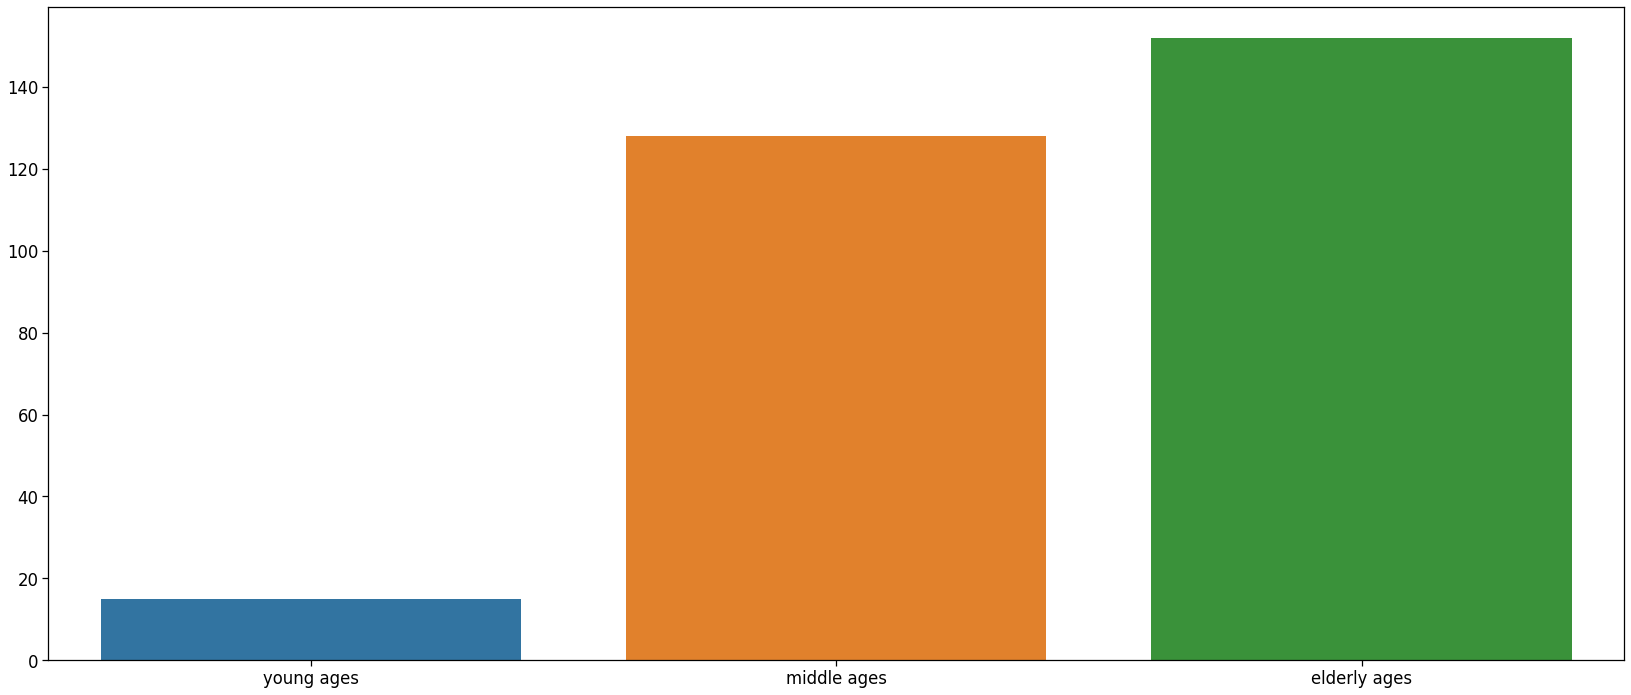

In [ ]:
data=dataset
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


--------------------
age : [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
--------------------
sex : [1. 0.]
--------------------
cp : [1. 4. 3. 2.]
--------------------
trestbps : [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
--------------------
chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303.

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,56.0,120.0,236.0,178.0,0.8,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,0.172994,-0.665300,-0.206864,1.243266,-0.206705,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.5604395604395604
